In [5]:
import os
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio

In [19]:
%matplotlib inline
sns.set(color_codes=True)

In [11]:
# Load pheno file
path_root = '/media/yassinebha/database27/Drive/HCP/'
data = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/language_RL-LR_pheno_scrub_raw_19-Dec-2016.csv'))
data_clean = data.dropna() # remove nan's
data_clean.head()

,Subject,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID,Handedness,BMI,Gender,ReadEng_Unadj,PicVocab_Unadj,ListSort_Unadj,FD,FD_scrubbed
0,HCP100206,27,NotTwin,NotTwin,56037,85858.0,65,26.64,M,113.5460,119.89140,112.89,0.088456,0.088456
1,HCP100307,27,Twin,NotMZ,51488,81352.0,95,22.96,F,111.0700,107.20000,108.06,0.101970,0.101970
2,HCP100408,33,Twin,MZ,51730,81594.0,55,27.75,M,131.8100,134.24000,108.06,0.128052,0.128052
3,HCP100610,27,Twin,NotMZ,52813,82634.0,85,36.91,M,141.3166,140.81510,117.39,0.189474,0.189474
4,HCP101006,35,Twin,MZ,51283,81149.0,90,30.27,F,113.5374,95.42348,93.90,0.156877,0.156877


In [12]:
data_clean.describe()

,Age_in_Yrs,Mother_ID,Father_ID,Handedness,BMI,ReadEng_Unadj,PicVocab_Unadj,ListSort_Unadj,FD,FD_scrubbed
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,28.814356,52775.367574,82623.382426,65.402228,26.514678,117.037051,116.833065,111.117005,0.144210,0.133914
std,3.651510,1625.575826,1608.023359,45.047741,5.224210,10.653246,9.424650,11.301997,0.051017,0.036235
min,22.000000,50371.000000,80310.000000,-100.000000,16.480000,84.200000,90.690000,80.790000,0.057141,0.057141
25%,26.000000,51553.000000,81414.000000,60.000000,22.795000,109.637550,110.585825,104.060000,0.111227,0.107814
50%,29.000000,52168.000000,82031.500000,80.000000,25.470000,117.995950,117.155000,108.060000,0.133225,0.128608
75%,32.000000,52962.000000,82784.000000,90.000000,29.282500,124.597850,122.991725,117.390000,0.165305,0.154143
max,37.000000,56202.000000,86021.000000,100.000000,47.760000,150.710000,153.088900,144.500000,0.473389,0.287642


In [14]:
data_subset = data_clean.get(['Age_in_Yrs', 'Handedness','BMI','ReadEng_Unadj',
                        'PicVocab_Unadj','ListSort_Unadj','FD','FD_scrubbed'])

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


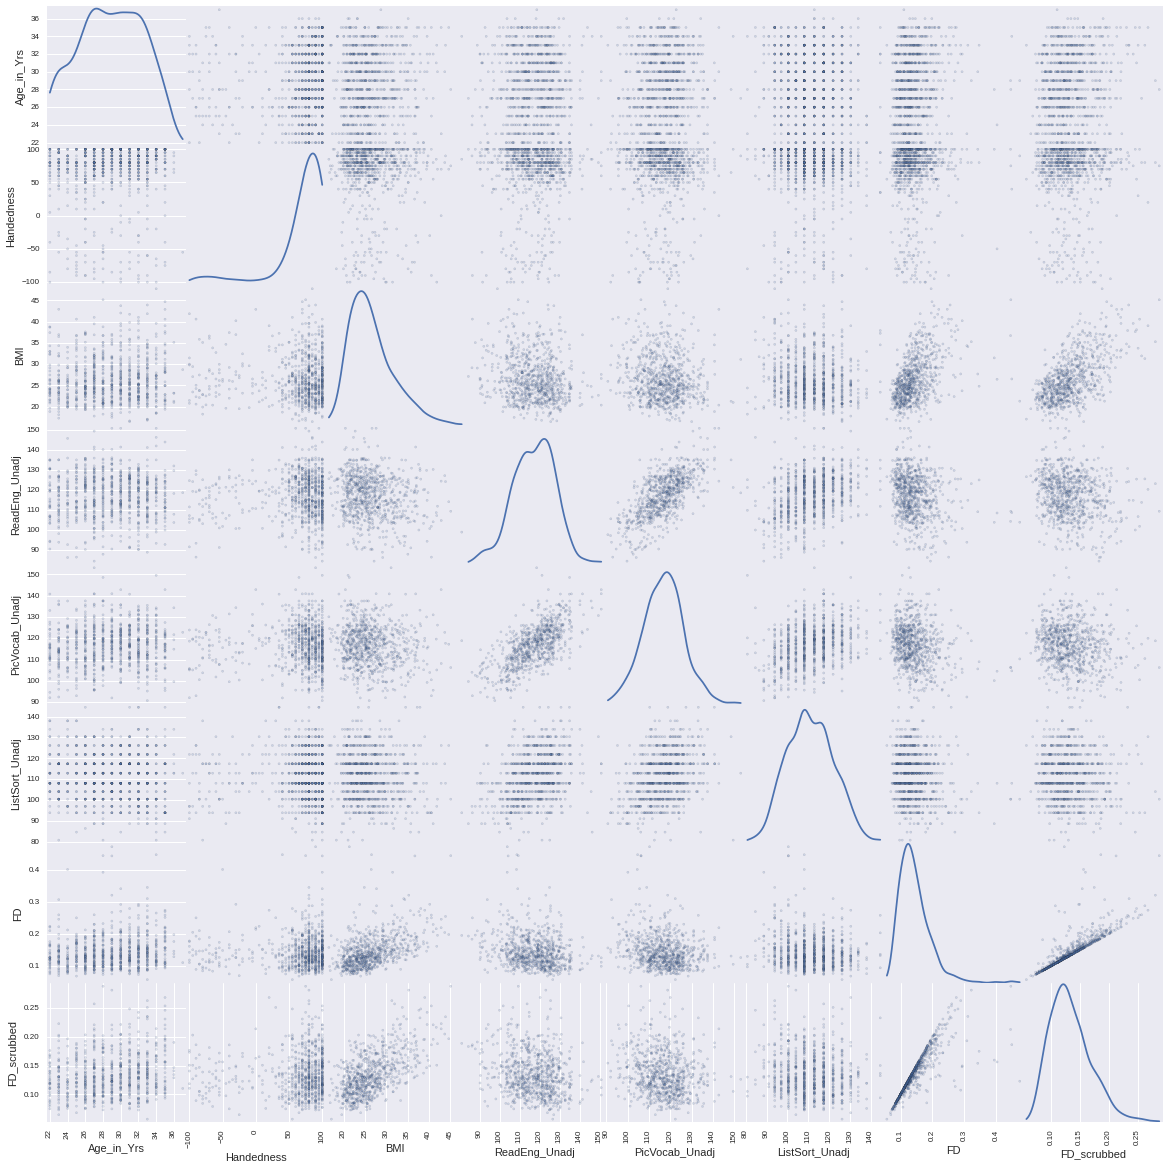

In [15]:
plot_dist = scatter_matrix(data_subset, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [16]:
# Compute the correlation matrix
corr = data_subset.corr()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


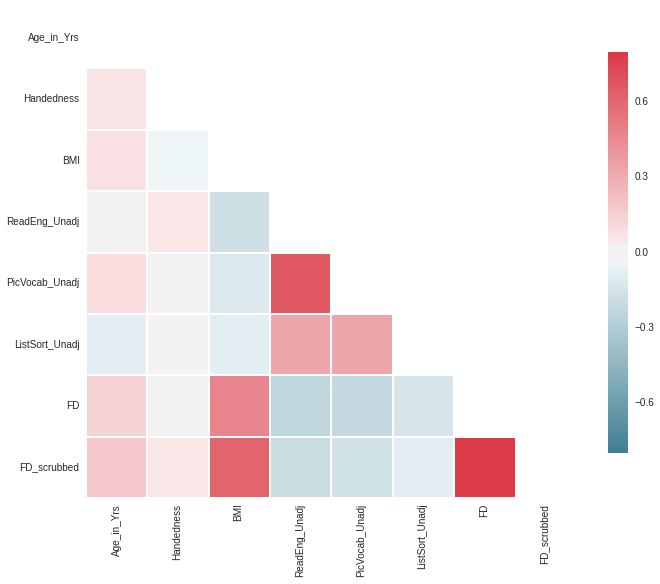

In [17]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.8,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

#### The most correlated pheno

A high correlation between FD and BMI

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


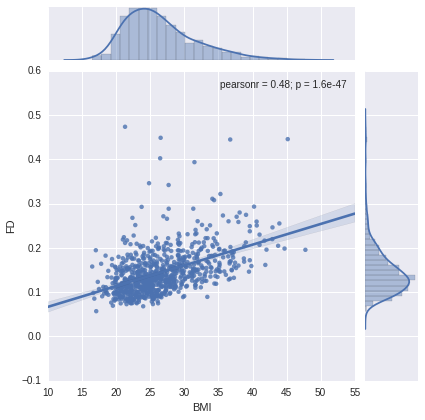

In [20]:
sns.jointplot(x="BMI", y="FD", data=data_subset,kind="reg");

Also hight correlation between ReadEng_Unadj and PicVocab_Unadj

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


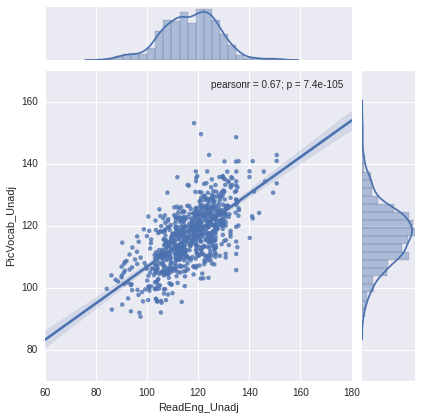

In [22]:
sns.set(color_codes=True)
sns.jointplot(x="ReadEng_Unadj", y="PicVocab_Unadj", data=data_subset,kind='reg');

Working memory score is also correlated with the language tasks 

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


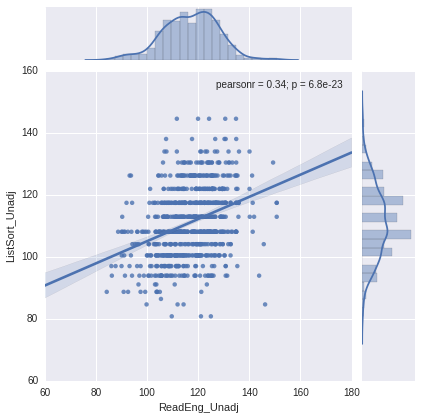

In [23]:
sns.set(color_codes=True)
sns.jointplot(x="ReadEng_Unadj", y="ListSort_Unadj", data=data_subset,kind='reg');

#### Gender differences

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: ReadEng_Unadj, dtype: object

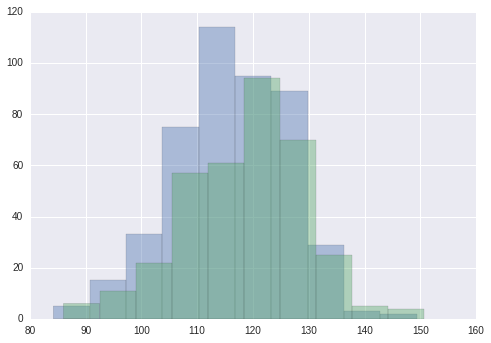

In [24]:
# Gender diference - Strength
data.groupby('Gender').ReadEng_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: ListSort_Unadj, dtype: object

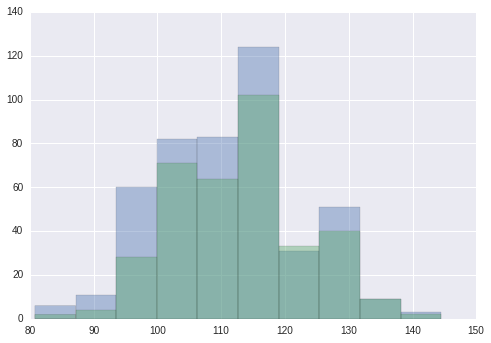

In [25]:
# Gender diference - Dexterity
data.groupby('Gender').ListSort_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: PicVocab_Unadj, dtype: object

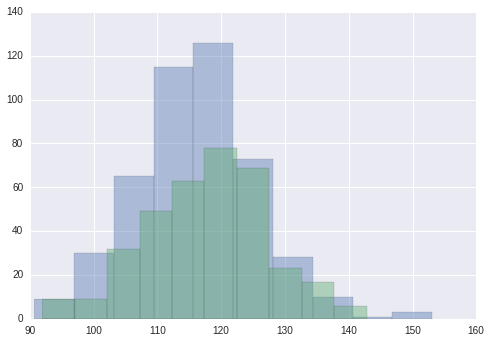

In [26]:
# Gender diference - PainInterf_Tscore
data.groupby('Gender').PicVocab_Unadj.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: BMI, dtype: object

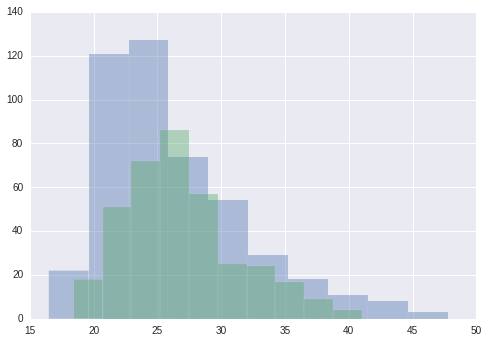

In [122]:
# Gender diference - BMI
data.groupby('Gender').BMI.hist(alpha=0.4)

Gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: FD, dtype: object

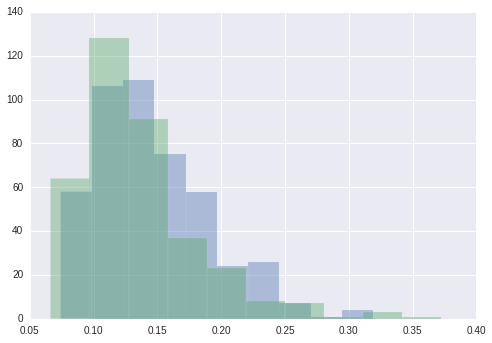

In [123]:
# Gender diference - FD
data.groupby('Gender').FD.hist(alpha=0.4)